In [854]:
import pandas as pd
import csv
import numpy
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [855]:
data = pd.read_csv("results.csv")  
str='Spain' 

In [856]:
Team_data1=data[data['home_team'].where(data[ 'away_team']==str ).notnull()]

In [857]:
Team_data2=data[data['home_team'].where(data[ 'home_team']==str  ).notnull()]

In [858]:
frames = [Team_data1 , Team_data2]
result = pd.concat(frames)

In [859]:
Team_data2=Team_data2.reset_index()

In [860]:
Team_data2

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,623,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False
1,697,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False
2,780,1923-12-16,Spain,Portugal,3,0,Friendly,Seville,Spain,False
3,863,1924-12-21,Spain,Austria,2,1,Friendly,Barcelona,Spain,False
4,895,1925-06-14,Spain,Italy,1,0,Friendly,Valencia,Spain,False
...,...,...,...,...,...,...,...,...,...,...
359,41649,2020-09-06,Spain,Ukraine,4,0,UEFA Nations League,Madrid,Spain,False
360,41713,2020-10-10,Spain,Switzerland,1,0,UEFA Nations League,Madrid,Spain,False
361,41864,2020-11-17,Spain,Germany,6,0,UEFA Nations League,Seville,Spain,False
362,41956,2021-03-25,Spain,Greece,1,1,FIFA World Cup qualification,Granada,Spain,False


In [861]:
selected_columns = Team_data2[["home_score"]]
Team_data2_goals = selected_columns.copy()

In [862]:
Team_data2_goals

,home_score
0,3
1,3
2,3
3,2
4,1
...,...
359,4
360,1
361,6
362,1


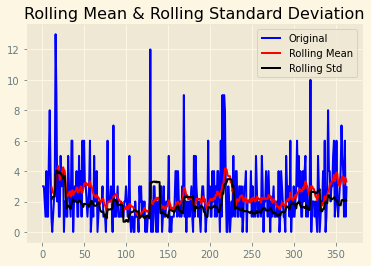

In [863]:
rolling_mean = Team_data2_goals.rolling(window = 12).mean()
rolling_std = Team_data2_goals.rolling(window = 12).std()
plt.plot(Team_data2_goals, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [864]:
    
result = adfuller(Team_data2_goals['home_score'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -17.75924778737159
p-value: 3.343993570867579e-30
Critical Values:
	1%: -3.448493650810824
	5%: -2.8695352280356556
	10%: -2.5710293341377715


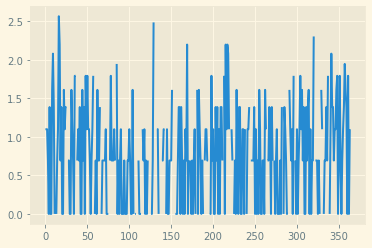

In [865]:
df_log = np.log(Team_data2_goals)
plt.plot(df_log)

In [866]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['home_score'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

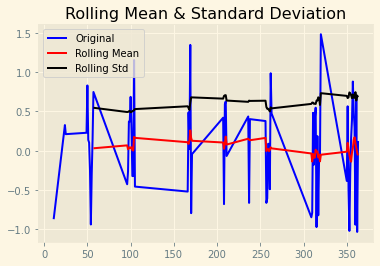

ADF Statistic: -6.105306158087036
p-value: 9.616638593987899e-08
Critical Values:
	1%: -3.5352168748293127
	5%: -2.9071540828402367
	10%: -2.5911025443786984


In [867]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

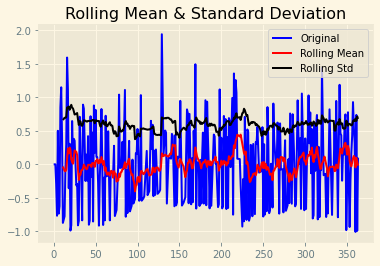

ADF Statistic: -11.106626043024514
p-value: 3.7487726249373344e-20
Critical Values:
	1%: -3.450886958636161
	5%: -2.870586350823483
	10%: -2.5715897843576827


In [868]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)

get_stationarity(df_log_exp_decay)

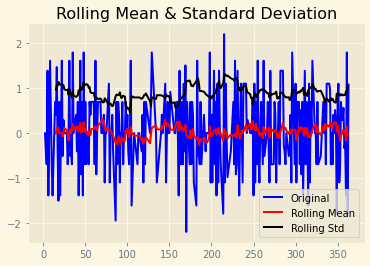

ADF Statistic: -14.523964500888615
p-value: 5.466684271428826e-27
Critical Values:
	1%: -3.4535872903895797
	5%: -2.871771355211212
	10%: -2.5722217283277127


In [869]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [870]:
df_log.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported

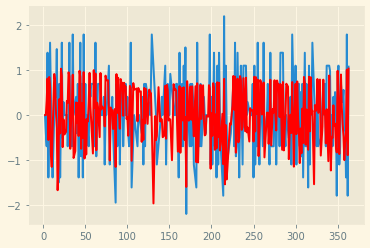

In [871]:
#data_without_missing_values = df_log.dropna(axis=1)


decomposition = seasonal_decompose(df_log,period=1) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

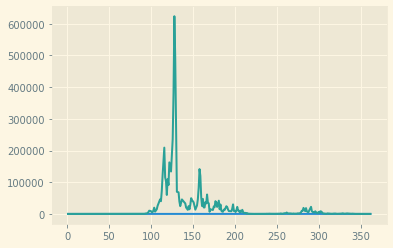

In [872]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['home_score'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Team_data2_goals)
plt.plot(predictions_ARIMA)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


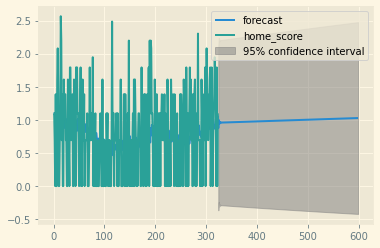

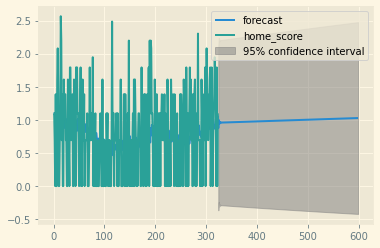

In [873]:
results.plot_predict(1,600)

In [874]:

for i in df_log['home_score']:
    print(i)

1.0986122886681098
1.0986122886681098
1.0986122886681098
0.6931471805599453
0.0
1.3862943611198906
0.0
0.0
1.6094379124341003
2.0794415416798357
1.3862943611198906
0.0
0.0
0.6931471805599453
1.0986122886681098
2.5649493574615367
2.1972245773362196
0.6931471805599453
1.3862943611198906
0.0
0.0
1.6094379124341003
1.0986122886681098
1.3862943611198906
1.3862943611198906
0.6931471805599453
0.6931471805599453
0.0
0.0
1.6094379124341003
1.0986122886681098
0.6931471805599453
0.0
1.791759469228055
1.791759469228055
0.6931471805599453
1.0986122886681098
0.6931471805599453
1.3862943611198906
0.0
0.0
1.6094379124341003
0.6931471805599453
1.3862943611198906
0.0
1.791759469228055
1.0986122886681098
1.791759469228055
1.0986122886681098
1.0986122886681098
0.6931471805599453
0.0
0.6931471805599453
1.0986122886681098
1.791759469228055
0.0
0.6931471805599453
0.0
1.6094379124341003
0.6931471805599453
0.6931471805599453
1.3862943611198906
0.0
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931